In [6]:
while ft:

    country_name = ft.GetFieldAsString('admin')

    outraster = inraster.replace('.tif', '_%s.tif' % country_name.replace(' ', '_'))    
    subprocess.call(['gdalwarp', inraster, outraster, '-cutline', inshape, 
                     '-crop_to_cutline', '-cwhere', "'admin'='%s'" % country_name])

    ft = lyr.GetNextFeature()

ds = None

AttributeError: 'NoneType' object has no attribute 'replace'

## Clip raster with vector

In [86]:
import rasterio
# https://rasterio.readthedocs.io/en/latest/quickstart.html

import numpy as np
import matplotlib.pyplot as plt

import fiona
from rasterstats.io import Raster
from rasterstats import zonal_stats

In [90]:
# https://rasterio.readthedocs.io/en/latest/topics/image_processing.html
dataset = rasterio.open('D:\\S3\\s3jm\\S3B_OL_1_EFR____20200219T133638_20200219T133938_20200220T164913_0179_035_352_3060_LN1_O_NT_002_processed.tif').read()

In [92]:
dataset.shape

(16, 4576, 4866)

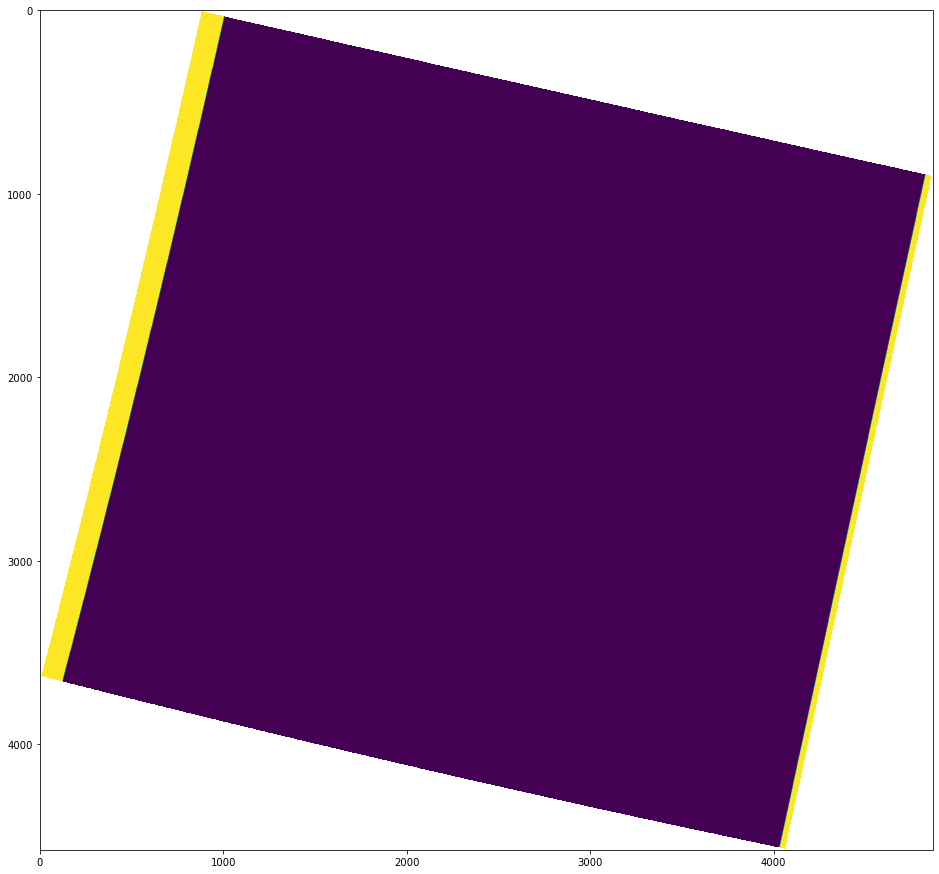

In [101]:
plt.imshow(dataset[3])

## CLIP USING FIONA

In [29]:
def clip_raster_by_shp(rasterpath, shppath, band=1):
    """
    Given an input raster (path) and shapefile (path), returns the raster object
    corresponding to the raster defined by the bounds of the shapefile
    """

    with fiona.open(shppath,nan_as_nodata=True) as f:
        geom_bounds = f.bounds

    with Raster(rasterpath, band=band) as raster_obj:
        rast = raster_obj.read(bounds=geom_bounds) 

    return rast

In [83]:
crop_raster = clip_raster_by_shp(rasterpath='D:\\S3\\s3jm\\S3B_OL_1_EFR____20200219T133638_20200219T133938_20200220T164913_0179_035_352_3060_LN1_O_NT_002_processed.tif',
                   shppath='D:\\A1_JM\\areas\\manacapuru.shp',
                                 band=2)

C:\Users\david\.conda\envs\git-prj\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [85]:
crop_raster.shape

(110, 279)

In [33]:
with fiona.open('D:\\A1_JM\\areas\\manacapuru.shp') as src:
    zs = zonal_stats(src, 'D:\\S3\\s3jm\\S3B_OL_1_EFR____20200219T133638_20200219T133938_20200220T164913_0179_035_352_3060_LN1_O_NT_002_processed.tif',
                stats="count",
                raster_out=True)
    


In [32]:
zs

dict_keys(['count', 'mini_raster_array', 'mini_raster_affine', 'mini_raster_nodata'])

In [35]:
zs

[{'count': 3018,
  'mini_raster_array': masked_array(
    data=[[--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          ...,
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --]],
    mask=[[ True,  True,  True, ...,  True,  True,  True],
          [ True,  True,  True, ...,  True,  True,  True],
          [ True,  True,  True, ...,  True,  True,  True],
          ...,
          [ True,  True,  True, ...,  True,  True,  True],
          [ True,  True,  True, ...,  True,  True,  True],
          [ True,  True,  True, ...,  True,  True,  True]],
    fill_value=1e+20,
    dtype=float32),
  'mini_raster_affine': Affine(0.002888242611433055, 0.0, -61.30751929140992,
         0.0, -0.002888242611433055, -3.3054980803041083),
  'mini_raster_nodata': -999}]

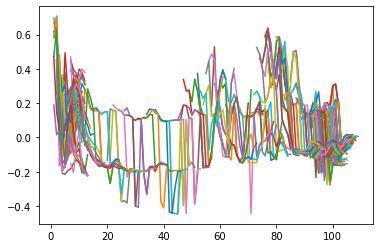

In [42]:
mskdt = zs[0]['mini_raster_array']

plt.plot(mskdt)

In [80]:
mskdt.shape

(110, 279)

In [57]:
from rasterio.plot import show, show_hist

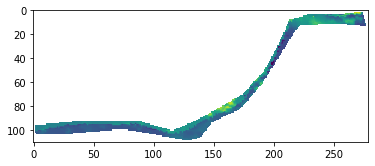

In [45]:
show(mskdt)

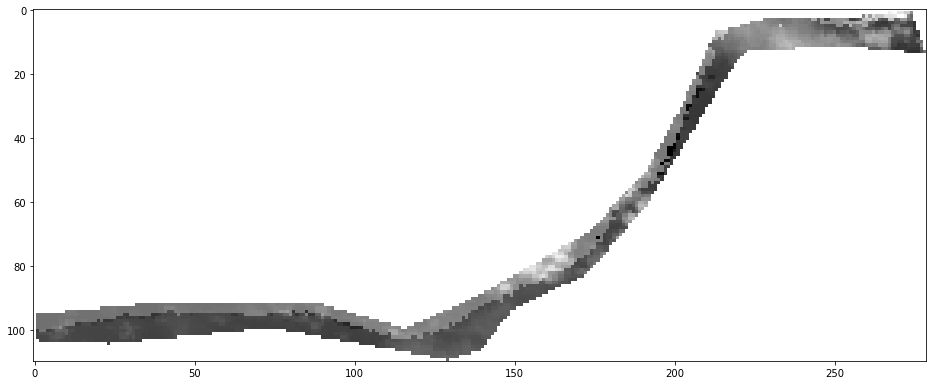

In [78]:
plt.rcParams['figure.figsize'] = [16, 16]
plt.imshow(mskdt,cmap='gray')

TypeError: scatter() missing 1 required positional argument: 'y'

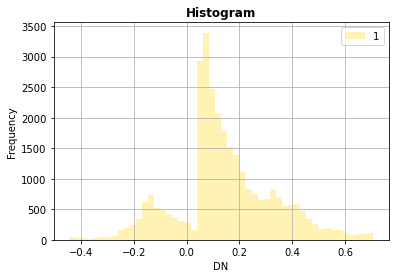

In [62]:
show_hist(
    mskdt, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram")

In [67]:
plt.rcParams['figure.figsize'] = [6.4, 4.8]

In [51]:
fulltiff = rasterio.open('D:\\S3\\s3jm\\S3B_OL_1_EFR____20200219T133638_20200219T133938_20200220T164913_0179_035_352_3060_LN1_O_NT_002_processed.tif',nan_as_nodata=True)

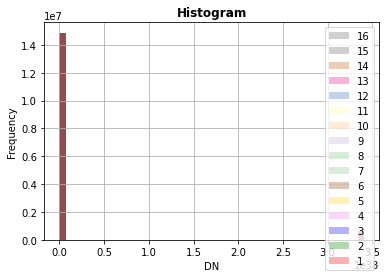

In [61]:
show_hist(
    fulltiff, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram")

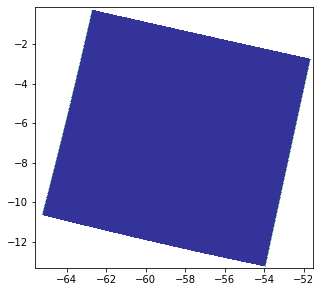

In [75]:
show(fulltiff.read(2), transform=fulltiff.transform, cmap='terrain')